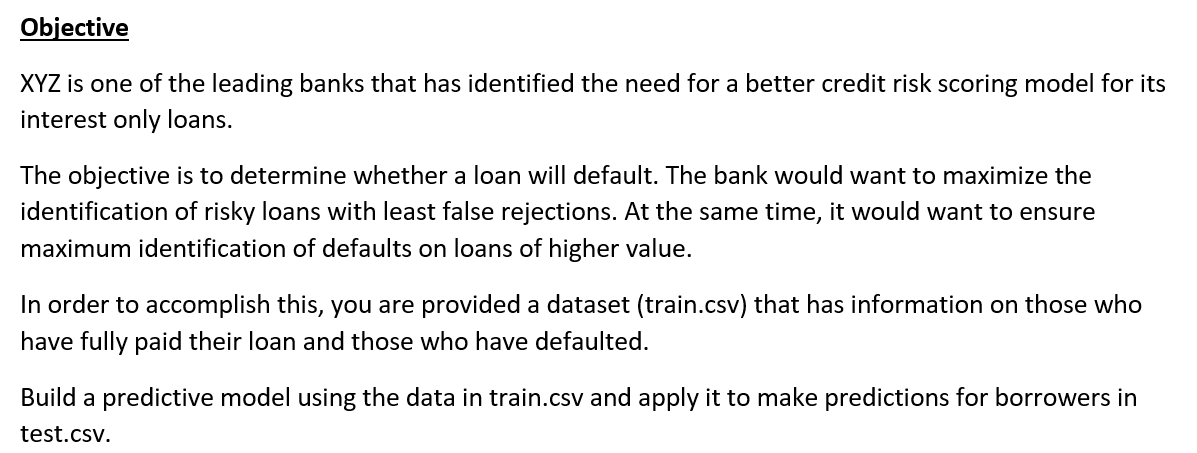

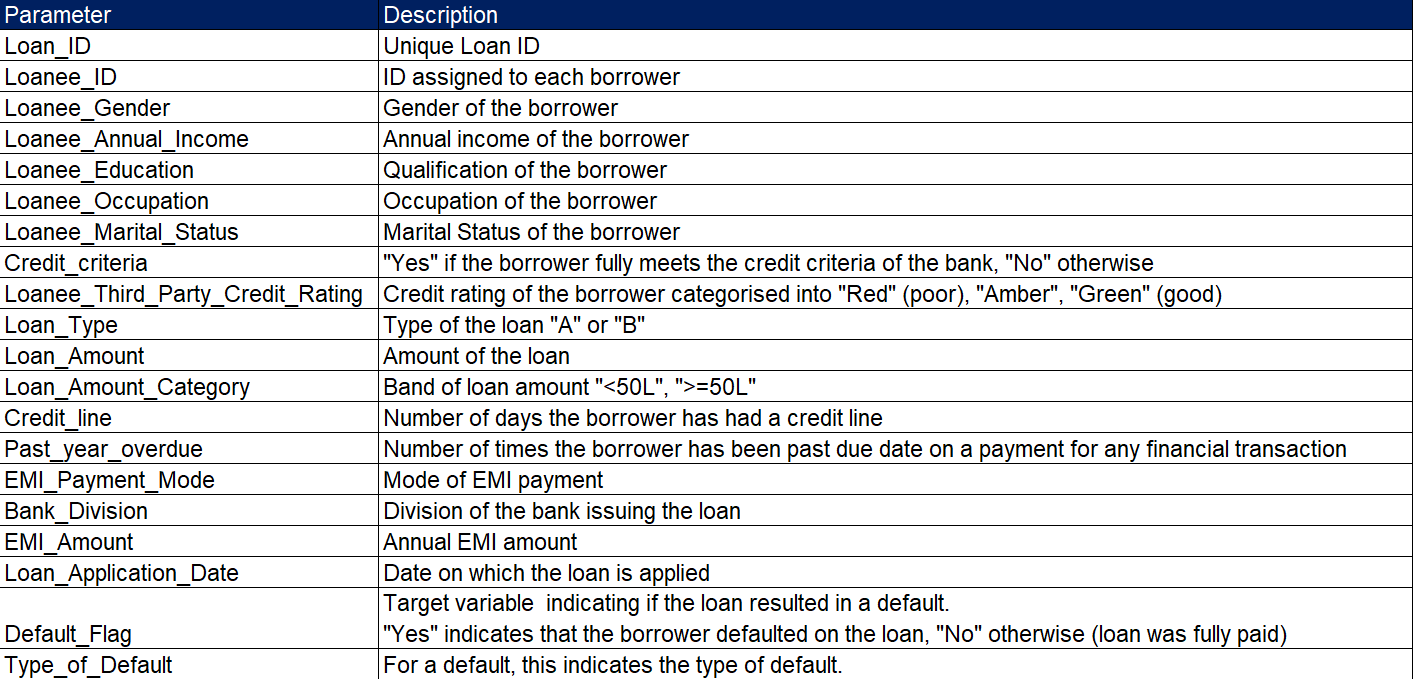

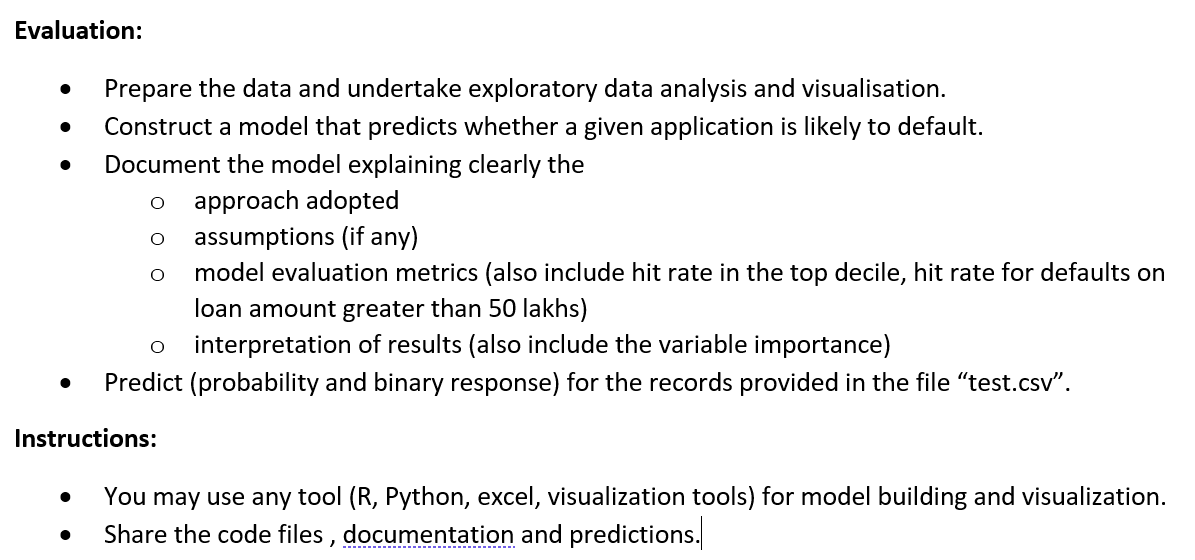

1. dataset exploration (raw data visualisation / describing data)
2. data pre-processing (cleaning, engineering, scaling, feature selection, pca)
3. training model using logistic regression, xgboost, decision tree, random forest, svm, naive bayes, ensemble
4. accuracy measures on test dataset
5. model visualisation (plotting of all models, accuracy measures)
6. conclusion 

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.svm import SVC




# Reading the file

In [3]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag,Type_of_Default
0,1,54549,M,300000.0,12th pass,SALARIED,M,Yes,Red,A,300000,<50L,10.0,1.0,M!,X1,3600,13/04/2004,No,NaN
1,2,109641,M,1475000.0,Graduatee,SALARIED,M,Yes,Red,A,10000000,>=50,30.0,26.0,M2,X2,11866,28/11/2003,No,NaN
2,3,110227,M,500000.0,Graduate,SALARIED,S,Yes,Green,A,10000000,>=50,26.0,22.0,M2,X3,7565,04/01/2004,No,NaN
3,4,104886,M,400000.0,Graduate,SALARIED,M,Yes,Amber,A,2500000,<50L,25.0,21.0,M2,X3,4993,08/09/2004,No,NaN
4,6,90854,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,25.0,21.0,M2,X1,18914,06/05/2003,No,NaN


# Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397303 entries, 0 to 397302
Data columns (total 20 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397303 non-null  int64  
 1   Client_ID                         397303 non-null  int64  
 2   Loanee_Gender                     397301 non-null  object 
 3   Loanee_Annual_Income              397303 non-null  float64
 4   Loanee_Education                  397303 non-null  object 
 5   Loanee_Occupation                 395307 non-null  object 
 6   Loanee_Marital_Status             397303 non-null  object 
 7   Credit_Criteria                   397303 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  397303 non-null  object 
 9   Loan_Type                         397303 non-null  object 
 10  Loan_Amount                       397303 non-null  int64  
 11  Loan_Amount_Category              397303 non-null  o

Type_of_Default indicates the number of defaultees, and out of 397303 entries, only 713 turned out to be defaulters

In [5]:
df.isnull().sum()

Loan_ID                                  0
Client_ID                                0
Loanee_Gender                            2
Loanee_Annual_Income                     0
Loanee_Education                         0
Loanee_Occupation                     1996
Loanee_Marital_Status                    0
Credit_Criteria                          0
Loanee_Third_Party_Credit_Rating         0
Loan_Type                                0
Loan_Amount                              0
Loan_Amount_Category                     0
Credit_line                            122
Past_year_overdue                      122
EMI_Payment_Mode                         0
Bank_Division                            0
EMI_Amount                               0
Loan_Application_Date                    0
Default_Flag                             0
Type_of_Default                     396590
dtype: int64

we can drop the 2 null values from Loanee_Gender and drop the Type_of_Default column all together

In [6]:
del df['Type_of_Default']
df = df.dropna(subset=['Loanee_Gender'])
df.isnull().sum()

Loan_ID                                0
Client_ID                              0
Loanee_Gender                          0
Loanee_Annual_Income                   0
Loanee_Education                       0
Loanee_Occupation                   1996
Loanee_Marital_Status                  0
Credit_Criteria                        0
Loanee_Third_Party_Credit_Rating       0
Loan_Type                              0
Loan_Amount                            0
Loan_Amount_Category                   0
Credit_line                          122
Past_year_overdue                    122
EMI_Payment_Mode                       0
Bank_Division                          0
EMI_Amount                             0
Loan_Application_Date                  0
Default_Flag                           0
dtype: int64

In [7]:
def null_defaulters(df):
    df_default = df[df['Default_Flag'] == 'Yes']
    null_counts = df_default.isnull().sum()
    return null_counts

null_value_counts_with_default = null_defaulters(df)

print(null_value_counts_with_default)


Loan_ID                              0
Client_ID                            0
Loanee_Gender                        0
Loanee_Annual_Income                 0
Loanee_Education                     0
Loanee_Occupation                   10
Loanee_Marital_Status                0
Credit_Criteria                      0
Loanee_Third_Party_Credit_Rating     0
Loan_Type                            0
Loan_Amount                          0
Loan_Amount_Category                 0
Credit_line                          0
Past_year_overdue                    0
EMI_Payment_Mode                     0
Bank_Division                        0
EMI_Amount                           0
Loan_Application_Date                0
Default_Flag                         0
dtype: int64


Loanee_Occupation has the most null values, and upon checking if the null values are defaulters or not, only 10 out of 1996 null values turned out to be defaulters and furthermore, only 10 out of the 713 (1.4%) are defaulters, therefore, we can combine these null values into the other category 

In [8]:
df['Loanee_Occupation'] = df['Loanee_Occupation'].fillna('Others')

In [9]:
df.isnull().sum()

Loan_ID                               0
Client_ID                             0
Loanee_Gender                         0
Loanee_Annual_Income                  0
Loanee_Education                      0
Loanee_Occupation                     0
Loanee_Marital_Status                 0
Credit_Criteria                       0
Loanee_Third_Party_Credit_Rating      0
Loan_Type                             0
Loan_Amount                           0
Loan_Amount_Category                  0
Credit_line                         122
Past_year_overdue                   122
EMI_Payment_Mode                      0
Bank_Division                         0
EMI_Amount                            0
Loan_Application_Date                 0
Default_Flag                          0
dtype: int64

now we have to deal with the null values in Credit_line and Past_year_overdue

In [10]:
df[df['Credit_line'].isnull()]['Default_Flag'].eq('Yes').sum()

0

In [11]:
df[df['Past_year_overdue'].isnull()]['Default_Flag'].eq('Yes').sum()

0

The null values in both of these columns correspond to No in our target variable. Out of 397303 entries, if we get rid of 122 null values, it's not going to result in any loss of information, hence these 2 columns are dropped

In [12]:
df.dropna(subset=['Credit_line', 'Past_year_overdue'], inplace=True)

In [13]:
df.isnull().sum()

Loan_ID                             0
Client_ID                           0
Loanee_Gender                       0
Loanee_Annual_Income                0
Loanee_Education                    0
Loanee_Occupation                   0
Loanee_Marital_Status               0
Credit_Criteria                     0
Loanee_Third_Party_Credit_Rating    0
Loan_Type                           0
Loan_Amount                         0
Loan_Amount_Category                0
Credit_line                         0
Past_year_overdue                   0
EMI_Payment_Mode                    0
Bank_Division                       0
EMI_Amount                          0
Loan_Application_Date               0
Default_Flag                        0
dtype: int64

We have no null values in our dataset anymore

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397179 entries, 0 to 397302
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397179 non-null  int64  
 1   Client_ID                         397179 non-null  int64  
 2   Loanee_Gender                     397179 non-null  object 
 3   Loanee_Annual_Income              397179 non-null  float64
 4   Loanee_Education                  397179 non-null  object 
 5   Loanee_Occupation                 397179 non-null  object 
 6   Loanee_Marital_Status             397179 non-null  object 
 7   Credit_Criteria                   397179 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  397179 non-null  object 
 9   Loan_Type                         397179 non-null  object 
 10  Loan_Amount                       397179 non-null  int64  
 11  Loan_Amount_Category              397179 non-null  o

# Exploratory Data Analysis

In [15]:
df.describe()

,Loan_ID,Client_ID,Loanee_Annual_Income,Loan_Amount,Credit_line,Past_year_overdue,EMI_Amount
count,397179.000000,397179.000000,3.971790e+05,3.971790e+05,397179.000000,397179.000000,3.971790e+05
mean,270133.354460,242792.266915,-1.372115e+06,5.965824e+06,26.601452,22.454692,1.096066e+04
std,239758.043946,127291.444243,1.587097e+09,6.851755e+06,11.402741,11.484189,1.380273e+04
min,1.000000,100.000000,-1.000000e+12,3.500000e+04,5.000000,1.000000,1.159000e+03
25%,100690.500000,142998.500000,3.200000e+05,2.500000e+06,20.000000,16.000000,5.040000e+03
50%,201295.000000,246733.000000,5.000000e+05,5.000000e+06,30.000000,26.000000,8.160000e+03
75%,301811.500000,350192.000000,1.000000e+06,8.000000e+06,35.000000,31.000000,1.307600e+04
max,780594.000000,764088.000000,9.410675e+09,5.000000e+08,57.000000,53.000000,2.773698e+06


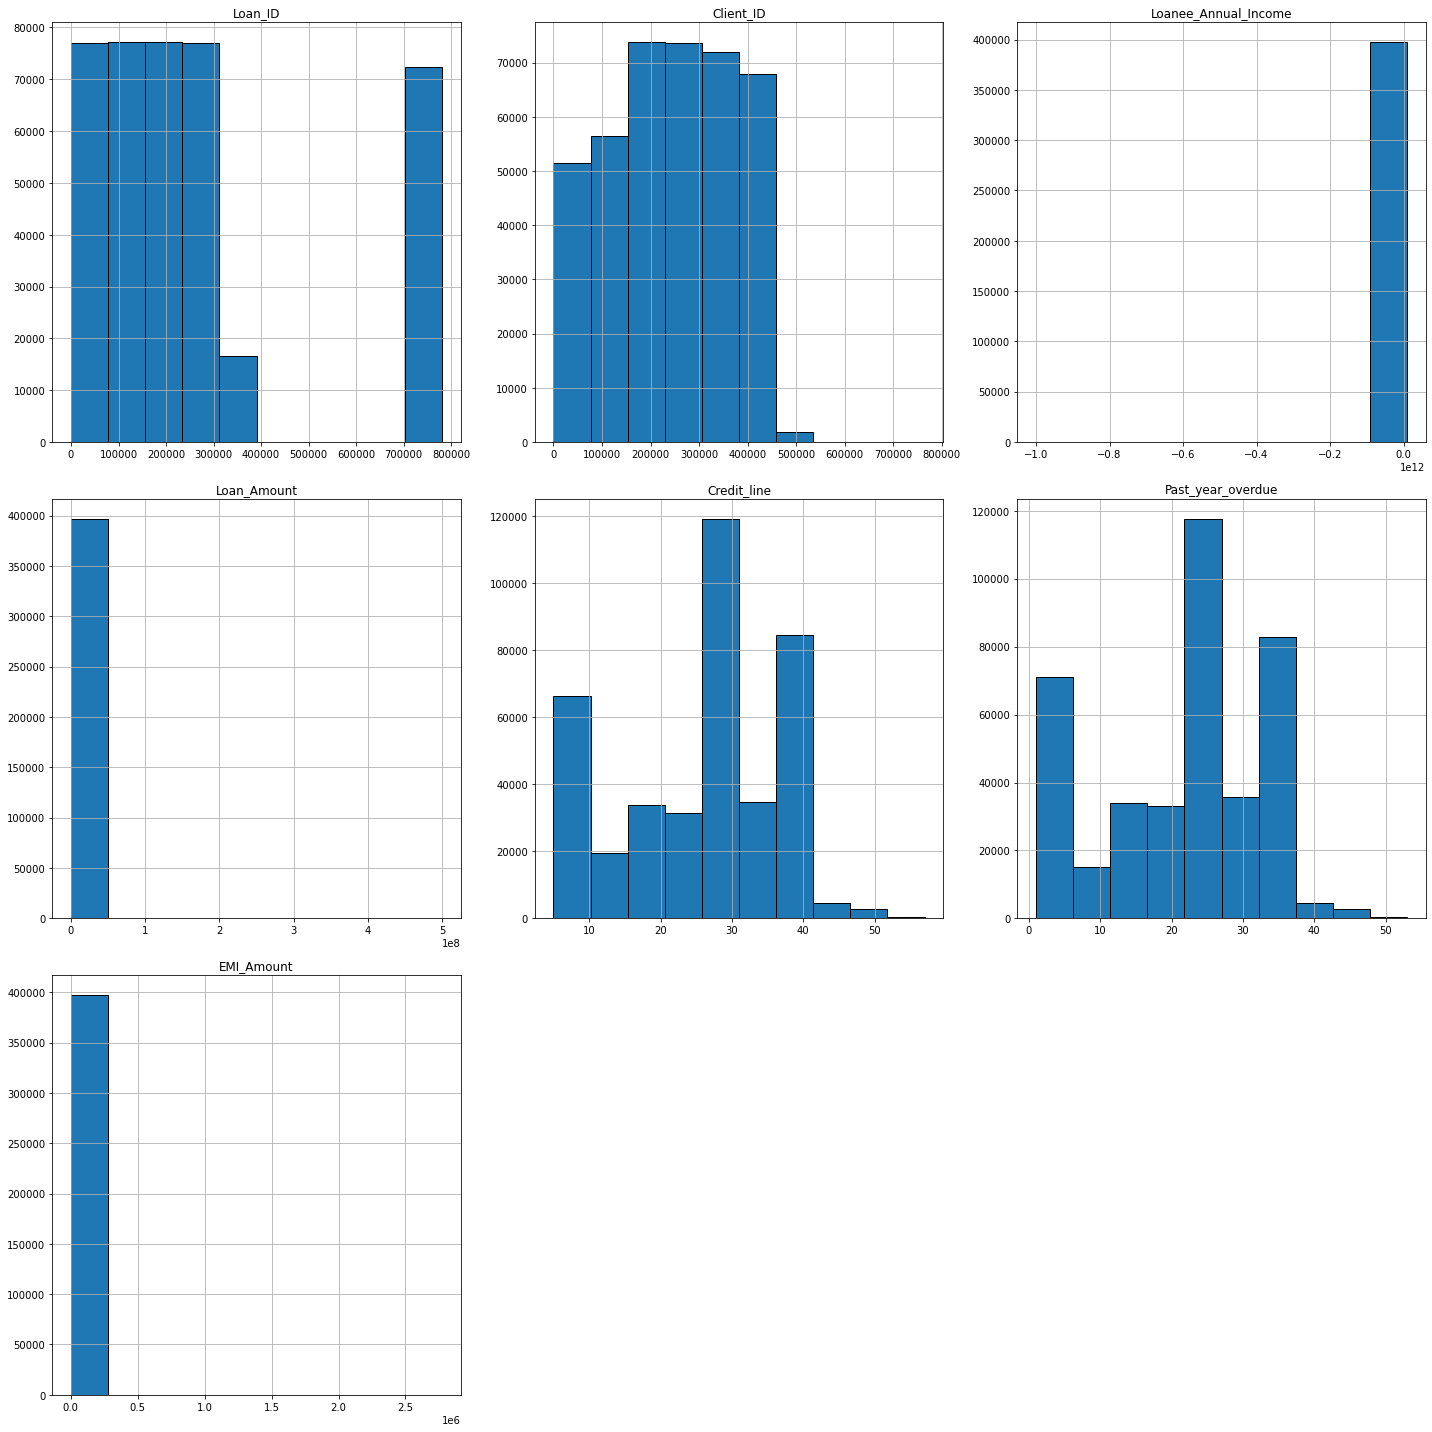

In [16]:
df.hist(figsize = (20,20),edgecolor='k')
plt.tight_layout()
plt.show()

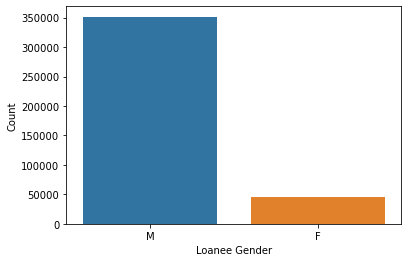

In [17]:
sns.countplot(x='Loanee_Gender', data=df)
plt.xlabel('Loanee Gender')
plt.ylabel('Count')
plt.show()

In [18]:
df['Loanee_Education'].value_counts()

Graduate               217966
Post Grad or Higher    109134
12th pass               28951
10th pass               17208
less than 10th pass     15555
Diploma                  8276
Other                      85
GRADUATE                    2
Graduatee                   2
Name: Loanee_Education, dtype: int64

## Plotting the categorical variables 

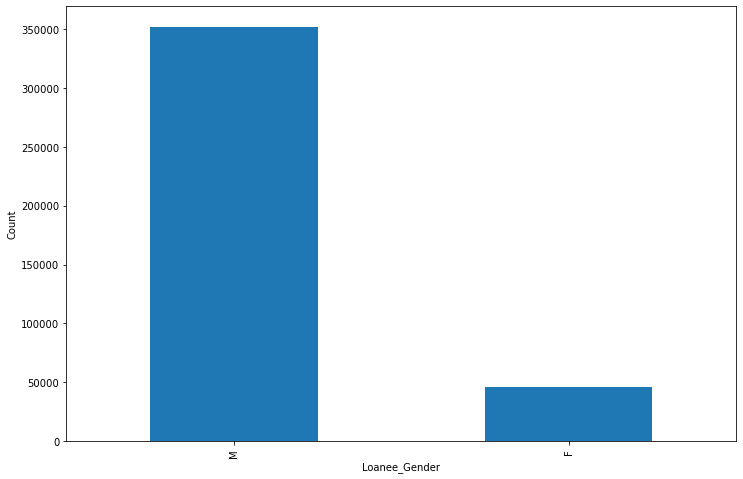

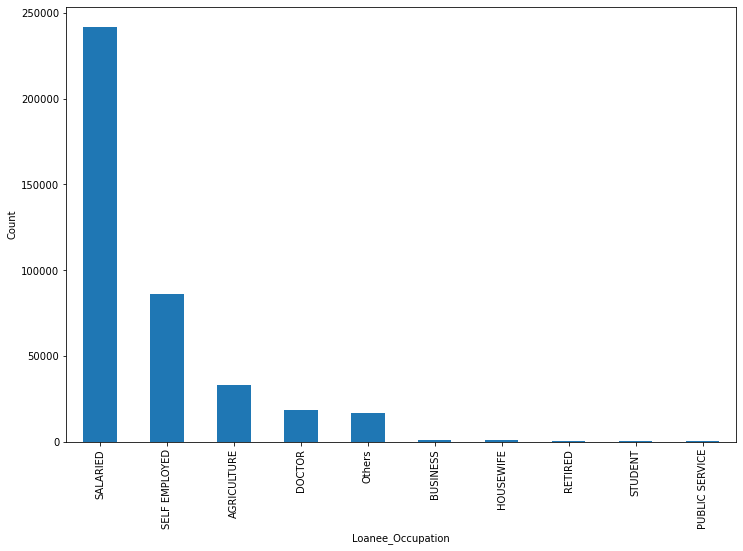

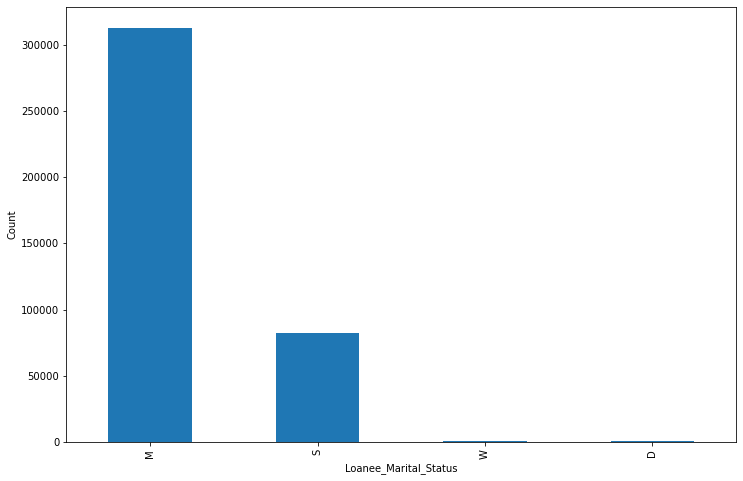

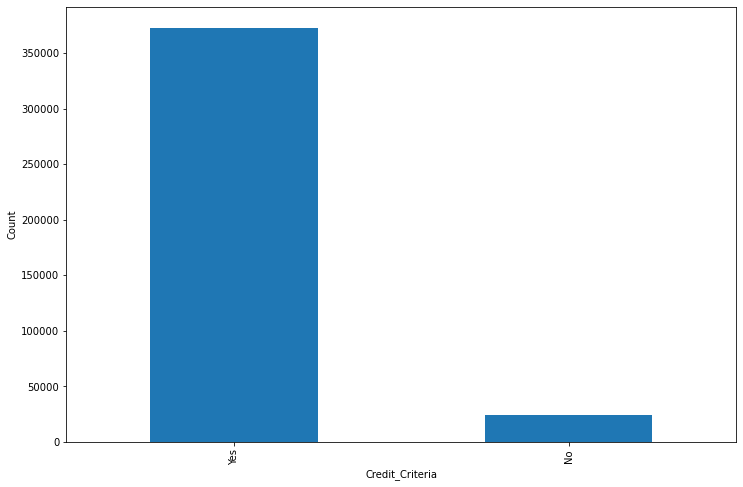

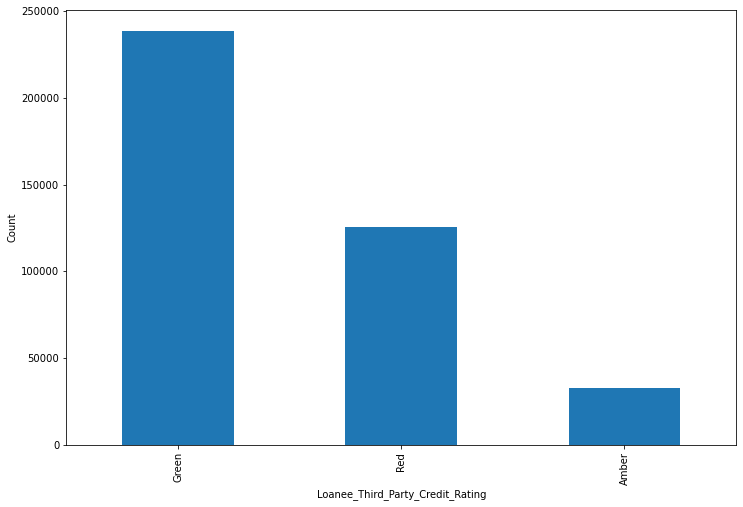

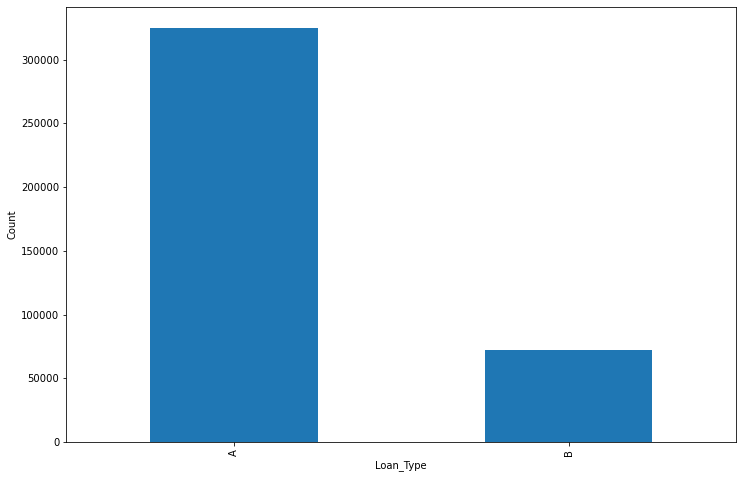

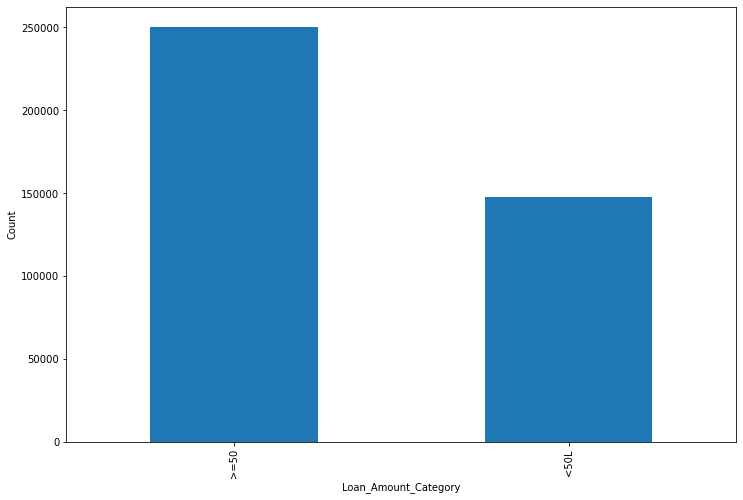

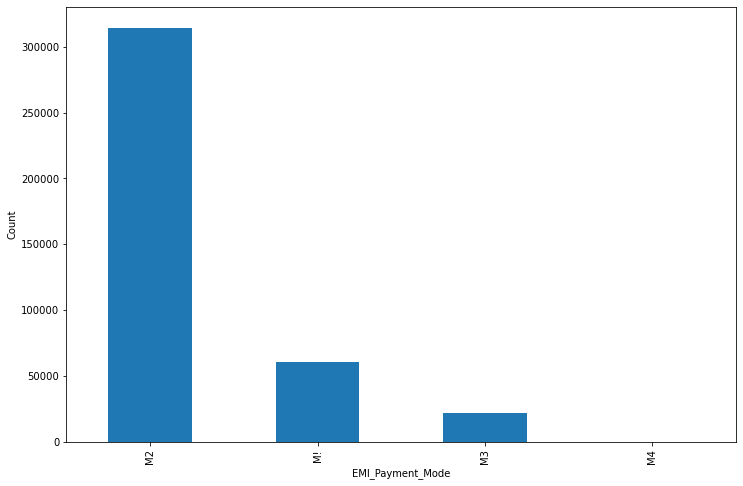

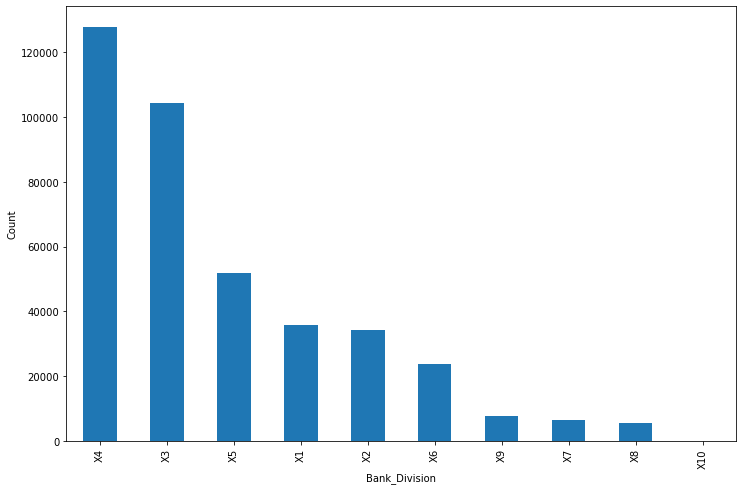

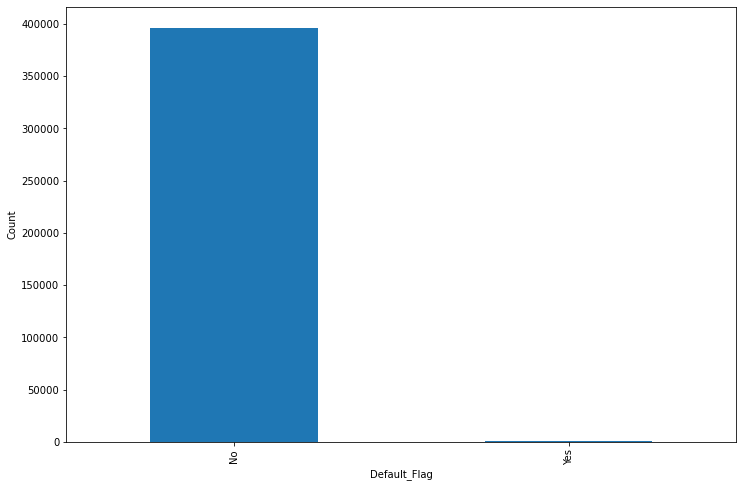

In [19]:


categorical_features = ['Loanee_Gender', 'Loanee_Occupation', 'Loanee_Marital_Status', 'Credit_Criteria',
                        'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
                        'EMI_Payment_Mode', 'Bank_Division', 'Default_Flag']

for feature in categorical_features:
    plt.figure(figsize=(12, 8))  # Set the figure size
    df[feature].value_counts().plot(kind='bar')  # Plot the bar chart
    plt.xlabel(feature)  # Set the x-label
    plt.ylabel('Count')  # Set the y-label
    plt.show()  # Show the plot


In [20]:
df.corr()

,Loan_ID,Client_ID,Loanee_Annual_Income,Loan_Amount,Credit_line,Past_year_overdue,EMI_Amount
Loan_ID,1.000000,-0.152299,-0.000284,-0.231989,-0.548816,-0.538737,-0.097007
Client_ID,-0.152299,1.000000,0.002557,-0.056479,0.129126,0.125719,-0.137249
Loanee_Annual_Income,-0.000284,0.002557,1.000000,-0.000369,-0.001646,-0.001654,-0.000267
Loan_Amount,-0.231989,-0.056479,-0.000369,1.000000,0.280630,0.280402,0.750135
Credit_line,-0.548816,0.129126,-0.001646,0.280630,1.000000,0.997306,0.083725
Past_year_overdue,-0.538737,0.125719,-0.001654,0.280402,0.997306,1.000000,0.083365
EMI_Amount,-0.097007,-0.137249,-0.000267,0.750135,0.083725,0.083365,1.000000


## Using the correlation matrix to test if there are highly correlated values

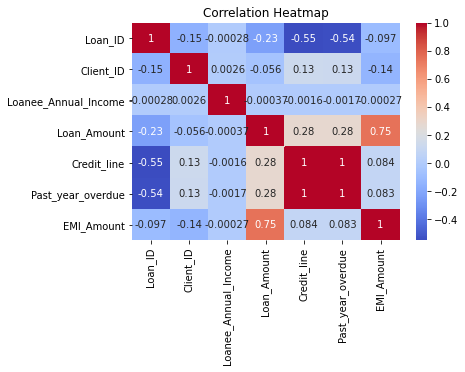

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Pre-processing

In [22]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


In [23]:

from fuzzywuzzy import fuzz

# List of known variations of the "graduate" category
graduate_variations = ['Graduate', 'Post Graduate', 'Grad', 'Grduate', 'Gradute', 'Graduat']

# Function to check similarity between a value and the "graduate" variations
def is_graduate(value):
    for variation in graduate_variations:
        if fuzz.ratio(value.lower(), variation.lower()) >= 80:
            return True
    return False

# Combine similar values under the label "Graduate"
df.loc[df['Loanee_Education'].apply(lambda x: is_graduate(x)), 'Loanee_Education'] = 'Graduate'
df.loc[df['Loanee_Education'].isin(['Graduatee', 'GRADUATE']), 'Loanee_Education'] = 'Graduate'


In [24]:
df['Loanee_Education'].value_counts()

Graduate               217970
Post Grad or Higher    109134
12th pass               28951
10th pass               17208
less than 10th pass     15555
Diploma                  8276
Other                      85
Name: Loanee_Education, dtype: int64

In [25]:

label_encoder = LabelEncoder()
# Create a dictionary to store the label encoders and mappings
label_encoders = {}
label_mappings = {}

# Iterate over each categorical column
for column in categorical_features:
    # Check if the column is categorical (object type)
    if df[column].dtype == 'object':
        # Create a LabelEncoder object for the column
        
        # Apply label encoding to the column
        encoded_labels = label_encoder.fit_transform(df[column].astype(str))
        # Store the label encoder and encoded labels in the dictionary
        label_encoders[column] = label_encoder
        # Get the unique original values for the column
        original_values = label_encoder.inverse_transform(encoded_labels)
        # Create a dictionary mapping encoded labels to original values
        label_mapping = {label: value for label, value in zip(encoded_labels, original_values)}
        # Add the label mapping to the dictionary
        label_mappings[column] = label_mapping

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Column: {column}")
    for label, value in mapping.items():
        print(f"Encoded Label: {label}  Original Value: {value}")
    print()



Column: Loanee_Gender
Encoded Label: 1  Original Value: M
Encoded Label: 0  Original Value: F

Column: Loanee_Occupation
Encoded Label: 7  Original Value: SALARIED
Encoded Label: 2  Original Value: DOCTOR
Encoded Label: 9  Original Value: STUDENT
Encoded Label: 6  Original Value: RETIRED
Encoded Label: 5  Original Value: PUBLIC SERVICE
Encoded Label: 1  Original Value: BUSINESS
Encoded Label: 4  Original Value: Others
Encoded Label: 8  Original Value: SELF EMPLOYED
Encoded Label: 0  Original Value: AGRICULTURE
Encoded Label: 3  Original Value: HOUSEWIFE

Column: Loanee_Marital_Status
Encoded Label: 1  Original Value: M
Encoded Label: 2  Original Value: S
Encoded Label: 0  Original Value: D
Encoded Label: 3  Original Value: W

Column: Credit_Criteria
Encoded Label: 1  Original Value: Yes
Encoded Label: 0  Original Value: No

Column: Loanee_Third_Party_Credit_Rating
Encoded Label: 2  Original Value: Red
Encoded Label: 1  Original Value: Green
Encoded Label: 0  Original Value: Amber

Colu

In [26]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column
for column in categorical_features:
    # Check if the column is categorical (object type)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column].astype(str))

In [27]:
df

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date,Default_Flag
0,1,54549,1,300000.0,12th pass,7,1,1,2,0,300000,0,10.0,1.0,0,0,3600,13/04/2004,0
1,2,109641,1,1475000.0,Graduate,7,1,1,2,0,10000000,1,30.0,26.0,1,2,11866,28/11/2003,0
2,3,110227,1,500000.0,Graduate,7,2,1,1,0,10000000,1,26.0,22.0,1,3,7565,04/01/2004,0
3,4,104886,1,400000.0,Graduate,7,1,1,0,0,2500000,0,25.0,21.0,1,3,4993,08/09/2004,0
4,6,90854,1,1500000.0,Post Grad or Higher,7,1,1,2,0,5000000,1,25.0,21.0,1,0,18914,06/05/2003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397298,780590,227976,1,250000.0,less than 10th pass,0,1,1,2,1,200000,0,5.0,1.0,1,4,2812,07/07/2003,0
397299,780591,236334,1,200000.0,less than 10th pass,0,1,1,1,1,300000,0,5.0,1.0,1,4,4672,10/08/2003,0
397300,780592,347497,1,800000.0,Graduate,0,1,1,2,1,1500000,0,5.0,1.0,1,4,9029,31/07/2004,1
397301,780593,343065,1,250000.0,Graduate,0,1,1,1,1,360000,0,5.0,1.0,1,4,7951,30/05/2004,0


In [28]:
df['Loanee_Education'] = label_encoder.fit_transform(df['Loanee_Education'].astype(str))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397179 entries, 0 to 397302
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397179 non-null  int64  
 1   Client_ID                         397179 non-null  int64  
 2   Loanee_Gender                     397179 non-null  int32  
 3   Loanee_Annual_Income              397179 non-null  float64
 4   Loanee_Education                  397179 non-null  int32  
 5   Loanee_Occupation                 397179 non-null  int32  
 6   Loanee_Marital_Status             397179 non-null  int32  
 7   Credit_Criteria                   397179 non-null  int32  
 8   Loanee_Third_Party_Credit_Rating  397179 non-null  int32  
 9   Loan_Type                         397179 non-null  int32  
 10  Loan_Amount                       397179 non-null  int64  
 11  Loan_Amount_Category              397179 non-null  i

In [30]:
cols_to_convert = categorical_features
df[cols_to_convert] = df[cols_to_convert].astype(object)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397179 entries, 0 to 397302
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Loan_ID                           397179 non-null  int64  
 1   Client_ID                         397179 non-null  int64  
 2   Loanee_Gender                     397179 non-null  object 
 3   Loanee_Annual_Income              397179 non-null  float64
 4   Loanee_Education                  397179 non-null  int32  
 5   Loanee_Occupation                 397179 non-null  object 
 6   Loanee_Marital_Status             397179 non-null  object 
 7   Credit_Criteria                   397179 non-null  object 
 8   Loanee_Third_Party_Credit_Rating  397179 non-null  object 
 9   Loan_Type                         397179 non-null  object 
 10  Loan_Amount                       397179 non-null  int64  
 11  Loan_Amount_Category              397179 non-null  o

Retrieving month from the data, as date as a whole may not be relevant to the loan defaulting 

In [31]:
df['Month'] = pd.to_datetime(df['Loan_Application_Date']).dt.month
del df['Loan_Application_Date']
df['Month'].astype=object


In [32]:
df

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Default_Flag,Month
0,1,54549,1,300000.0,1,7,1,1,2,0,300000,0,10.0,1.0,0,0,3600,0,4
1,2,109641,1,1475000.0,3,7,1,1,2,0,10000000,1,30.0,26.0,1,2,11866,0,11
2,3,110227,1,500000.0,3,7,2,1,1,0,10000000,1,26.0,22.0,1,3,7565,0,4
3,4,104886,1,400000.0,3,7,1,1,0,0,2500000,0,25.0,21.0,1,3,4993,0,8
4,6,90854,1,1500000.0,5,7,1,1,2,0,5000000,1,25.0,21.0,1,0,18914,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397298,780590,227976,1,250000.0,6,0,1,1,2,1,200000,0,5.0,1.0,1,4,2812,0,7
397299,780591,236334,1,200000.0,6,0,1,1,1,1,300000,0,5.0,1.0,1,4,4672,0,10
397300,780592,347497,1,800000.0,3,0,1,1,2,1,1500000,0,5.0,1.0,1,4,9029,1,7
397301,780593,343065,1,250000.0,3,0,1,1,1,1,360000,0,5.0,1.0,1,4,7951,0,5


# Model Building

Splitting the data 

In [35]:
X = df.drop('Default_Flag', axis=1)
y = df['Default_Flag'].ravel()
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [36]:
# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9980990986454504


This model does have 99.8% accuracy, but now let's look at the confusion matrix

In [37]:
#Making the confusion matrix for training data set
y_pred = logreg.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[317180      0]
 [   563      0]]


Because our data is very noisy and imbalanced, the logistic regression model classifies everything under not defaulting, hence we'll use an ensemble method involving XGBoost, Random Forest Classifier and Support Vector Classifier

# Random Forest Classifier

In [38]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
train_accuracy = rf_classifier.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [40]:
# Assuming you have trained your model
test_accuracy = rf_classifier.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9982375749030666


In [41]:
y_pred=rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[79277     8]
 [  132    19]]


In [42]:
precision = precision_score(y_test, y_pred)
precision

0.7037037037037037

# Support Vector Classifier

In [48]:
from sklearn.model_selection import cross_val_score
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)

# Perform cross-validation on the training data
cv_scores = cross_val_score(svc_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:")
print(cv_scores)
print("Mean Accuracy: ", cv_scores.mean())
print("Standard Deviation: ", cv_scores.std())

Cross-Validation Accuracy Scores:
[0.99822184 0.99822184 0.99822184 0.99823755 0.99823755]
Mean Accuracy:  0.998228127822957
Standard Deviation:  7.695392992001033e-06


In [49]:
y_pred=svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[79285     0]
 [  151     0]]


In [50]:

precision = precision_score(y_test, y_pred)
precision

0.0

We can observe that the RF classifier is the best suited for our data as it doesn't classify everything under true positives or false negatives. 
The objective is to find a model where higher number of false negatives is alarming

### hit rate in the top decile, hit rate for defaults on loan amount greater than 50 lakhs

In [44]:


# Assuming your dataset is stored in a DataFrame called 'df'

# Calculate the predicted probabilities for each record
y_prob = logreg.predict_proba(X_test)[:, 1]  # Replace 'logreg' with your trained model

# Combine the predicted probabilities and actual labels into a DataFrame
results = pd.DataFrame({'Probability': y_prob, 'Actual': y_test, 'Loan_Amount': X_test['Loan_Amount']})

# Sort the DataFrame by predicted probabilities in descending order
results = results.sort_values('Probability', ascending=False)

# Calculate the total number of records in the top decile
top_decile = int(len(results) * 0.1)

# Get the top decile of records
top_decile_records = results.head(top_decile)

# Calculate the hit rate in the top decile
top_decile_hit_rate = top_decile_records['Actual'].mean()

# Filter the records where the loan amount is greater than 50 lakhs
high_loan_amount_records = results[results['Loan_Amount'] > 5000000]

# Calculate the hit rate for defaults on loan amount greater than 50 lakhs
high_loan_amount_defaults = high_loan_amount_records[high_loan_amount_records['Actual'] == 1]
high_loan_amount_hit_rate = high_loan_amount_defaults.shape[0] / high_loan_amount_records.shape[0]

# Print the results
print("Hit Rate in Top Decile:", top_decile_hit_rate)
print("Hit Rate for Defaults on Loan Amount > 50 lakhs:", high_loan_amount_hit_rate)


Hit Rate in Top Decile: 0.001258970162407151
Hit Rate for Defaults on Loan Amount > 50 lakhs: 0.0007181901607947971


The Random forest classifier performs best on the model, and hence we'll try it out on our test data

In [45]:
df_test=pd.read_csv('test.csv')
df_test

,Loan_ID,Client_ID,Loanee_Gender,Loanee_Annual_Income,Loanee_Education,Loanee_Occupation,Loanee_Marital_Status,Credit_Criteria,Loanee_Third_Party_Credit_Rating,Loan_Type,Loan_Amount,Loan_Amount_Category,Credit_line,Past_year_overdue,EMI_Payment_Mode,Bank_Division,EMI_Amount,Loan_Application_Date
0,329120,110551,M,400000.0,Graduate,SALARIED,M,Yes,Green,A,1500000,<50L,10,6,M2,X4,14874,06/08/2005
1,329121,19105,M,600000.0,Graduate,SALARIED,S,No,Green,A,1500000,<50L,29,25,M!,X3,15816,27/06/2005
2,329122,90521,M,414000.0,Post Grad or Higher,SALARIED,S,Yes,Green,A,5000000,>=50,27,23,M3,X3,7710,21/06/2006
3,329123,25177,M,1500000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,10000000,>=50,28,24,M2,X5,13259,24/07/2005
4,329124,127806,M,600000.0,Post Grad or Higher,SALARIED,M,Yes,Red,A,5000000,>=50,20,16,M2,X3,9170,11/09/2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398559,801088,683549,F,300000.0,Graduatee,HOUSEWIFE,M,Yes,Red,B,3000000,<50L,32,28,M2,X4,7098,31/07/2006
398560,801089,429617,M,400000.0,12th pass,AGRICULTURE,M,Yes,Green,B,400000,<50L,5,1,M2,X4,3782,04/04/2005
398561,801090,503945,M,300000.0,10th pass,AGRICULTURE,S,Yes,Red,B,5000000,>=50,30,26,M2,X4,6831,01/08/2005
398562,801091,637191,M,250000.0,Graduatee,AGRICULTURE,M,Yes,Amber,B,2500000,<50L,5,1,M2,X4,6212,06/05/2006


1. Feature 'Loan_ID': 0.4339689731892038
2. Feature 'Client_ID': 0.10991583407400225
3. Feature 'EMI_Amount': 0.08745419049510822
4. Feature 'Loanee_Annual_Income': 0.05733879733691139
5. Feature 'Loan_Amount': 0.04850550617750061
6. Feature 'Loanee_Occupation': 0.041662828610226306
7. Feature 'Default_Flag': 0.04097160193152427
8. Feature 'Past_year_overdue': 0.029727264263507257
9. Feature 'Credit_line': 0.029685554881336673
10. Feature 'Bank_Division': 0.029458437342593655
11. Feature 'Loanee_Education': 0.022291009447102002
12. Feature 'Loan_Type': 0.020872723020201604
13. Feature 'Loanee_Third_Party_Credit_Rating': 0.016091800798114498
14. Feature 'EMI_Payment_Mode': 0.009489536762721082
15. Feature 'Loanee_Marital_Status': 0.00811037384295289
16. Feature 'Loanee_Gender': 0.006558158750333184
17. Feature 'Credit_Criteria': 0.004823189509676408
18. Feature 'Loan_Amount_Category': 0.003074219566983903


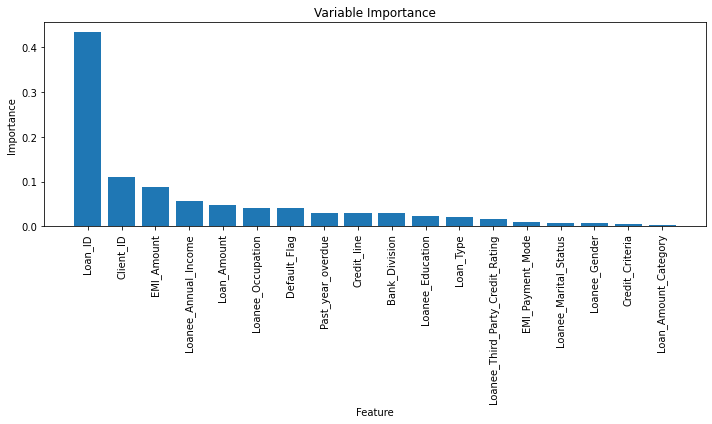

In [46]:
feature_names = df.columns.tolist()

importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]

# Print the feature importances with column names
for i, feature_index in enumerate(sorted_indices):
    print(f"{i+1}. Feature '{feature_names[feature_index]}': {sorted_importances[i]}")

# Plot the feature importances with column names
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), sorted_importances, tick_label=[feature_names[i] for i in sorted_indices])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Variable Importance')
plt.tight_layout()
plt.show()

# Working on the test dataframe

In [47]:
df_test=pd.read_csv('test.csv')
df_test

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Create a dictionary to store the label encoders and mappings
label_encoders = {}
label_mappings = {}

# Iterate over each categorical column
for column in ['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation', 'Loanee_Marital_Status',
                   'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
                   'EMI_Payment_Mode', 'Bank_Division']:
    # Check if the column is categorical (object type)
    if df_test[column].dtype == 'object':
        # Create a LabelEncoder object for the column
        
        # Apply label encoding to the column
        encoded_labels = label_encoder.fit_transform(df_test[column].astype(str))
        # Store the label encoder and encoded labels in the dictionary
        label_encoders[column] = label_encoder
        # Get the unique original values for the column
        original_values = label_encoder.inverse_transform(encoded_labels)
        # Create a dictionary mapping encoded labels to original values
        label_mapping = {label: value for label, value in zip(encoded_labels, original_values)}
        # Add the label mapping to the dictionary
        label_mappings[column] = label_mapping

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Column: {column}")
    for label, value in mapping.items():
        print(f"Encoded Label: {label}  Original Value: {value}")
    print()



from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each categorical column
for column in ['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation', 'Loanee_Marital_Status',
                   'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
                   'EMI_Payment_Mode', 'Bank_Division']:
    # Check if the column is categorical (object type)
    if df_test[column].dtype == 'object':
        # Apply label encoding to the column
        df_test[column] = label_encoder.fit_transform(df_test[column].astype(str))


from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'Loanee_Education' column
df_test['Loanee_Education'] = label_encoder.fit_transform(df_test['Loanee_Education'].astype(str))



# Convert specific columns to object data type
'''cols_to_convert = ['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation', 'Loanee_Marital_Status',
                   'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
                   'EMI_Payment_Mode', 'Bank_Division']
'''

cols_to_convert = ['Loanee_Gender', 'Loanee_Education', 'Loanee_Occupation', 'Loanee_Marital_Status',
                   'Credit_Criteria', 'Loanee_Third_Party_Credit_Rating', 'Loan_Type', 'Loan_Amount_Category',
                   'EMI_Payment_Mode', 'Bank_Division']
df_test[cols_to_convert] = df_test[cols_to_convert].astype(object)

df_test.info()


import pandas as pd
import datetime

# Assuming your DataFrame is named 'df_test' and the column containing the date is named 'Date'
df_test['Month'] = pd.to_datetime(df_test['Loan_Application_Date']).dt.month



df_test['Month'].astype=object

del df_test['Loan_Application_Date']

rf_classifier.predict(df_test)

rf_classifier.predict_proba(df_test)

Column: Loanee_Gender
Encoded Label: 1  Original Value: M
Encoded Label: 0  Original Value: F
Encoded Label: 2  Original Value: nan

Column: Loanee_Education
Encoded Label: 3  Original Value: Graduate
Encoded Label: 6  Original Value: Post Grad or Higher
Encoded Label: 1  Original Value: 12th pass
Encoded Label: 2  Original Value: Diploma
Encoded Label: 0  Original Value: 10th pass
Encoded Label: 7  Original Value: less than 10th pass
Encoded Label: 5  Original Value: Other
Encoded Label: 4  Original Value: Graduatee

Column: Loanee_Occupation
Encoded Label: 8  Original Value: SALARIED
Encoded Label: 2  Original Value: DOCTOR
Encoded Label: 7  Original Value: RETIRED
Encoded Label: 10  Original Value: STUDENT
Encoded Label: 6  Original Value: PUBLIC SERVICE
Encoded Label: 9  Original Value: SELF EMPLOYED
Encoded Label: 1  Original Value: BUSINESS
Encoded Label: 5  Original Value: Others
Encoded Label: 11  Original Value: nan
Encoded Label: 4  Original Value: NGO
Encoded Label: 0  Origi

array([[0.92, 0.08],
       [0.94, 0.06],
       [0.95, 0.05],
       ...,
       [0.7 , 0.3 ],
       [0.72, 0.28],
       [0.63, 0.37]])